In [4]:
import pandas as pd
import numpy as np

In [5]:
incomplete_df = pd.DataFrame({'id': [1,2,3,2,2,3,1,1,1,2,4],
                              'type': ['one', 'one', 'two', 'three', 'two', 'three', 'one', 'two', 'one', 'three','one'],
                              'amount': [345,928,np.NAN,645,113,942,np.NAN,539,np.NAN,814,np.NAN] 
                             }, columns=['id','type','amount'])

In [6]:
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,NaN
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,NaN
7,1,two,539.0
8,1,one,NaN
9,2,three,814.0


In [16]:
A = incomplete_df['amount']
B = pd.Series(data=[np.NAN,125,355,345,312,np.NAN,np.NAN,129,551,800,222])

In [17]:
print(A)
print('\n')
print(B)

0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64


0       NaN
1     125.0
2     355.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


In [18]:
A.mean()

618.0

In [19]:
print(B.min())
print(B.max())
print(B.std())
print(B.var())

125.0
800.0
226.7959671473144
51436.41071428572


In [20]:
print(A+B)

0        NaN
1     1053.0
2        NaN
3      990.0
4      425.0
5        NaN
6        NaN
7      668.0
8        NaN
9     1614.0
10       NaN
dtype: float64


In [21]:
print(A-B)

0       NaN
1     803.0
2       NaN
3     300.0
4    -199.0
5       NaN
6       NaN
7     410.0
8       NaN
9      14.0
10      NaN
dtype: float64


In [22]:
print(A*B)

0          NaN
1     116000.0
2          NaN
3     222525.0
4      35256.0
5          NaN
6          NaN
7      69531.0
8          NaN
9     651200.0
10         NaN
dtype: float64


In [23]:
A~

SyntaxError: invalid syntax (<ipython-input-23-9022e640e666>, line 1)

In [24]:
A

0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64

In [25]:
A.dropna()

0    345.0
1    928.0
3    645.0
4    113.0
5    942.0
7    539.0
9    814.0
Name: amount, dtype: float64

In [26]:
A.fillna(-5)

0     345.0
1     928.0
2      -5.0
3     645.0
4     113.0
5     942.0
6      -5.0
7     539.0
8      -5.0
9     814.0
10     -5.0
Name: amount, dtype: float64

In [27]:
A.fillna(0)

0     345.0
1     928.0
2       0.0
3     645.0
4     113.0
5     942.0
6       0.0
7     539.0
8       0.0
9     814.0
10      0.0
Name: amount, dtype: float64

In [28]:
A.fillna(-1)

0     345.0
1     928.0
2      -1.0
3     645.0
4     113.0
5     942.0
6      -1.0
7     539.0
8      -1.0
9     814.0
10     -1.0
Name: amount, dtype: float64

In [29]:
A.fillna('missing data')

0              345
1              928
2     missing data
3              645
4              113
5              942
6     missing data
7              539
8     missing data
9              814
10    missing data
Name: amount, dtype: object

In [30]:
A.fillna(A.mean())

0     345.0
1     928.0
2     618.0
3     645.0
4     113.0
5     942.0
6     618.0
7     539.0
8     618.0
9     814.0
10    618.0
Name: amount, dtype: float64

In [31]:
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,NaN
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,NaN
7,1,two,539.0
8,1,one,NaN
9,2,three,814.0


In [32]:
#fill in gaps in the amount column with means obtained from corresponding is's in the first column
incomplete_df['amount'].fillna(incomplete_df.groupby('id')['amount'].transform('mean'),inplace=True)
#if there is no corresponding ID, use overall mean
incomplete_df['amount'].fillna(incomplete_df['amount'].mean(), inplace=True)
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,942.0
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,442.0
7,1,two,539.0
8,1,one,442.0
9,2,three,814.0


In [34]:
print(B)
print('\n')
print(B.fillna(method='pad'))

0       NaN
1     125.0
2     355.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


0       NaN
1     125.0
2     355.0
3     345.0
4     312.0
5     312.0
6     312.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


In [35]:
B.fillna(method='bfill',limit=1)

0     125.0
1     125.0
2     355.0
3     345.0
4     312.0
5       NaN
6     129.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64

In [36]:
print(B)
print('\n')
print(B.interpolate())

0       NaN
1     125.0
2     355.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


0       NaN
1     125.0
2     355.0
3     345.0
4     312.0
5     251.0
6     190.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


In [37]:
B.interpolate(method='barycentric')

0            NaN
1     125.000000
2     355.000000
3     345.000000
4     312.000000
5     152.277778
6       2.436508
7     129.000000
8     551.000000
9     800.000000
10    222.000000
dtype: float64

In [38]:
B.interpolate(method='pchip')

0            NaN
1     125.000000
2     355.000000
3     345.000000
4     312.000000
5     246.420420
6     167.376877
7     129.000000
8     551.000000
9     800.000000
10    222.000000
dtype: float64

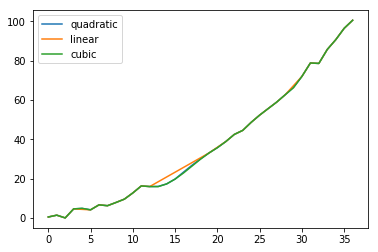

In [51]:
np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, .25)**2 + np.random.randn(37))
#spacje kurwa
bad = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[bad] = np.nan
methods = [ 'quadratic', 'linear', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()